chebyshev.ipynb was getting too big, so we're starting a new one

In [1]:
from sympy import init_session
init_session()
from mpmath import mpf
%matplotlib inline

IPython console for SymPy 1.0.1.dev (Python 3.5.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/dev



Now we try to mechanise the CRAM process

In [2]:
def bisect_roots(expr, bounds, eps=1e-7, division_cutoff=30, solver='bisect', **kwargs):
    """
    Numerically find all the roots of expr in bounds via bisection
    
    division_cutoff is the fraction of bounds to check for roots. 
    One should expect the roots to be no more than |bounds|/division_cutoff apart.
    """
    roots = []
    intervals = [bounds]
    var = expr.free_symbols.pop()
    N = 0
    while intervals:
        N += 1
        #print(intervals)
        b = intervals.pop()
        try:
            root = nsolve(expr, b, solver=solver, **kwargs)
        except ValueError:
            # No root found
            if (b[1] - b[0]) > (bounds[1] - bounds[0])/division_cutoff and sign(expr.evalf(subs={var: b[0]})) == sign(expr.evalf(subs={var: b[1]})):
                # The bisect method will only work if the interval has alternate signs.
                # If not, it will miss 2 roots, so try again with split intervals.
                intervals.append([b[0], (b[0] + b[1])/2])
                intervals.append([(b[0] + b[1])/2, b[1]])
                continue
        else:
            if root not in roots:
                roots.append(root)
                intervals.append([b[0], root - eps])
                intervals.append([root + eps, b[1]])
    
    print(N)
    return sorted(roots)

bisect_roots(sin(x), [-10, 13])

115


[mpf('-9.4247779607693797'),
 mpf('-6.2831853071795865'),
 mpf('-3.1415926535897932'),
 mpf('0.0'),
 mpf('3.1415926535897932'),
 mpf('6.2831853071795865'),
 mpf('9.4247779607693797'),
 mpf('12.566370614359173')]

In [25]:
def nsolve_intervals(expr, bounds, division=30, **kwargs):
    """
    Divide bounds into division intervals and nsolve in each one
    """
    roots = []
    L = bounds[1] - bounds[0]
    for i in range(division):
        interval = [bounds[0] + i*L/division, bounds[0] + (i + 1)*L/division]
        try:
            root = nsolve(expr, interval, solver='bisect', **kwargs)
        except ValueError:
            continue
        else:
            roots.append(root)
            
    return roots
        
#nsolve_intervals(D, [-1, 0.99])

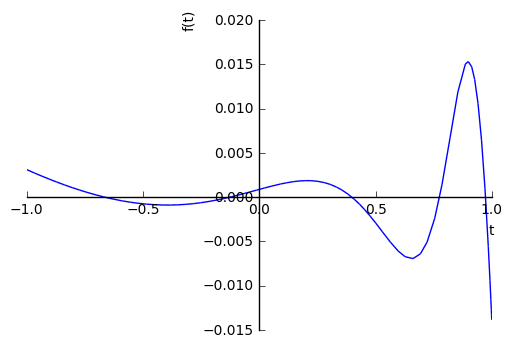

[-1, mpf('-0.39506511254488194246199448962614827641793897758069305848163786362903012773659849415062338099623164473027531694050244184330638864334'), mpf('0.20691058995492142764937583625839815019069161889091748351308696895163963999468679329009293380077251247958518101447374666973655625094'), mpf('0.65489012733236147516679919680141360845973917616127929823014029840205834517790973599112027949944172535595501832902748938153950898228'), mpf('0.89772666518036128601384053578679250339923635397216245960393450179915936351413730937390713036827098490597629587558428025283730048705'), 0.999]


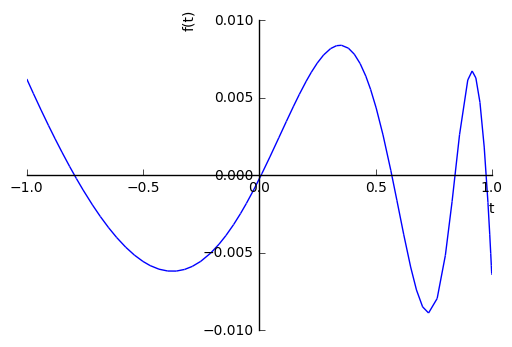

[-1, mpf('-0.37414267499841245108904598325657417382888754158871936757629631567383719522002211992917712558856732024597538139737636345166363643401'), mpf('0.34718736920006581910703417227541063219986623554374451291682575905871548465010874331125573810425566560302433362623523400681186886951'), mpf('0.72818971396861890265082151339330625622425088103617019067201168157328191567064750660011052661881171237904270220225369614168515711424'), mpf('0.91547718629366164866473666774781163324100963678815311021765181271414871946267968024954432592021198325499147618211787422205202038825'), 0.999]


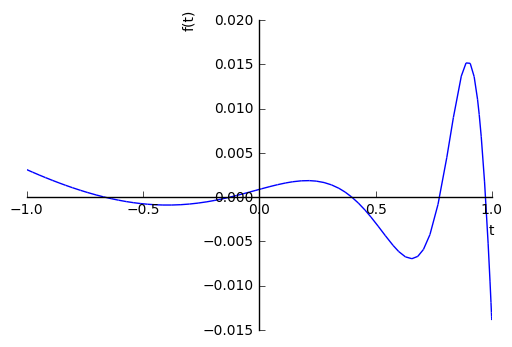

[-1, mpf('-0.39506511254488194246199448962614827641793897758069305848163786362903012773659849415062338099623164473027531694050244184330638864334'), mpf('0.20691058995492142764937583625839815019069161889091748351308696895163963999468679329009293380077251247958518101447374666973655625094'), mpf('0.65489012733236147516679919680141360845973917616127929823014029840205834517790973599112027949944172535595501832902748938153950898228'), mpf('0.89772666518036128601384053578679250339923635397216245960393450179915936351413730937390713036827098490597629587558428025283730048705'), 0.999]


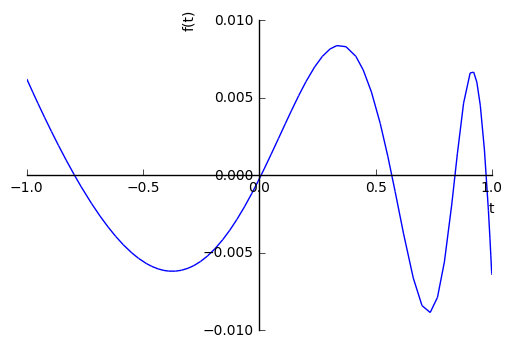

[-1, mpf('-0.37414267499841245108904598325657417382888754158871936757629631567383719522002211992917712558856732024597538139737636345166363643401'), mpf('0.34718736920006581910703417227541063219986623554374451291682575905871548465010874331125573810425566560302433362623523400681186886951'), mpf('0.72818971396861890265082151339330625622425088103617019067201168157328191567064750660011052661881171237904270220225369614168515711424'), mpf('0.91547718629366164866473666774781163324100963678815311021765181271414871946267968024954432592021198325499147618211787422205202038825'), 0.999]


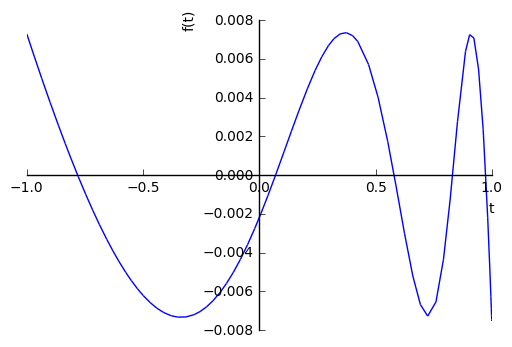

[-1, mpf('-0.33575627066828775098902896477086484597183482165647913410269106110349491954665155101633013521479206957664830383225946055829706027394'), mpf('0.36930238881822805154599009628443448880632832829781197124849535652983328019996664808654153428614275715557588467939483054957644037343'), mpf('0.72607669252755479780411329189246946153527551049911580191930708690828703993962165376128765591153339810723167945876053892207860887676'), mpf('0.91112239535817351898301202106940109475926912277051835231356377430970779614542819829463668018722608399701937575839145516023726489644'), 0.999]


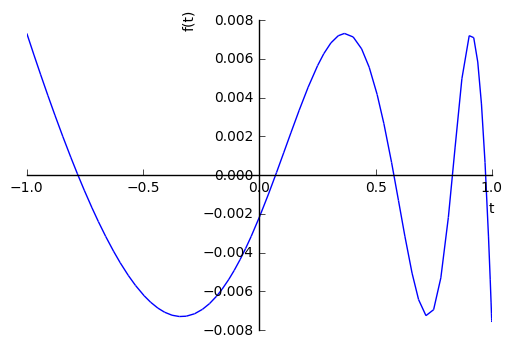

[-1, mpf('-0.33529387086041447974492714510642406109456131455839951422628462540058750577775922135250237753484820372000168073264511960267270239388'), mpf('0.36895683151347360913176462997883758528464068091112364607111563542462722083642701305871340286209802185631627570022652810483376706891'), mpf('0.72592536285617087736376448797183927911918379483989184191572210532535179642684724087446858780130693968156726477515761428562874720126'), mpf('0.9110993380106825583867681421766458203241241476806635905109457353956358918233087433582531132947168798481500983529516260437246899613'), 0.999]


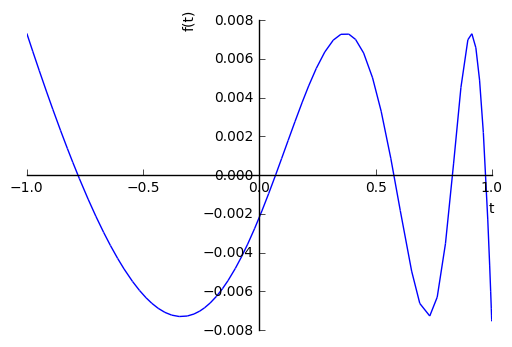

[-1, mpf('-0.33529366659804993328913895647092661989654408669700910136884094543831912030414028589312849098025646696424399471059493521021278998629'), mpf('0.36895687345956174477989426345674038242229262443292009931971880210186060259567071218074094367329895296320792167523776669091832669146'), mpf('0.72592531713721770043449553737541738634372937358616310672572887726235424082103601824014701109888555167727344435162971559605590381331'), mpf('0.91109931209178217498026592537248238973211596655316728784359341191792975899479646442084949269399174821940568570346723762900982000214'), 0.999]


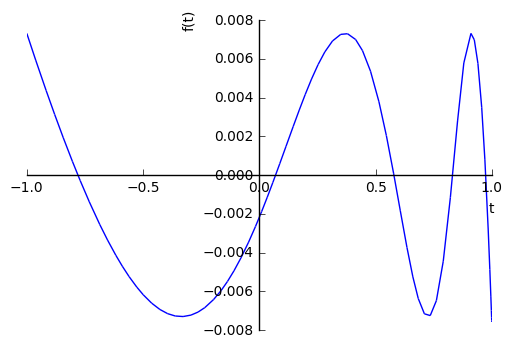

[-1, mpf('-0.33529366659804742159353828536398273520767132775072750482744412114539853440759344705489784342187286353875363822553220312219168585995'), mpf('0.36895687345955908698495778950119670155784134769181933021159059432913384210161229355949066188464602523494321461667225255310677263621'), mpf('0.7259253171372194677129846275212969363228846224146020320757592583752852321690193616200769536170692481623746156367379364856904949764'), mpf('0.91109931209178049401483376859268856385322298110104942340635108805477052479954412615924796870654912803253509657246749078841221498046'), 0.999]


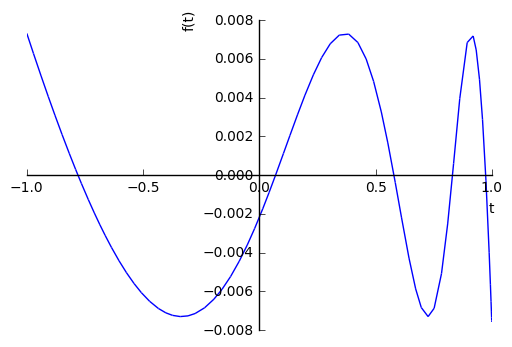

[-1, mpf('-0.33529366659804701677020362720453964781890604474541645489254266334424480136832571436021046190132380937397047056760362270554730451264'), mpf('0.36895687345956077010594912046420865849999409630529719699828941521531391100190293807521228394747096252685902675322908321482568869834'), mpf('0.72592531713721948506606229466988921438978667485010673543242414487510191016596008342892601935407461082187889135313514759101271342903'), mpf('0.91109931209178011112130640417949711259795075480758976600799486311897781125786015622942317774482671885818894667278865264587954096994'), 0.999]


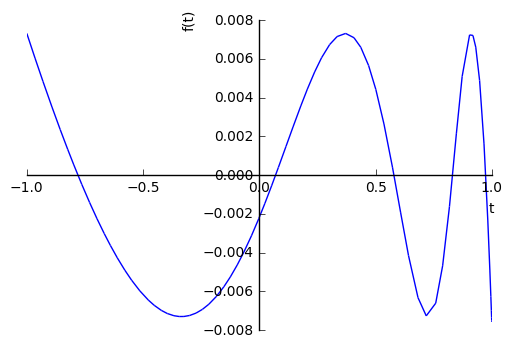

[-1, mpf('-0.33529366659804758590530358016182973300169471901578632086583995581595990382936049332494343164449556012236471889470238059830121966095'), mpf('0.36895687345955965914464045568554164999304443059395470235441696420626497458681079388235010062402434650585333418255045707921890207863'), mpf('0.72592531713721882722708743848923223344669958528081443334010086084077834581370705352049292133561020934555861010182109916340629538502'), mpf('0.91109931209178054887461952625221873480782117179283378344753593141981637344334422973362381051763255249625124000377613934107263634786'), 0.999]


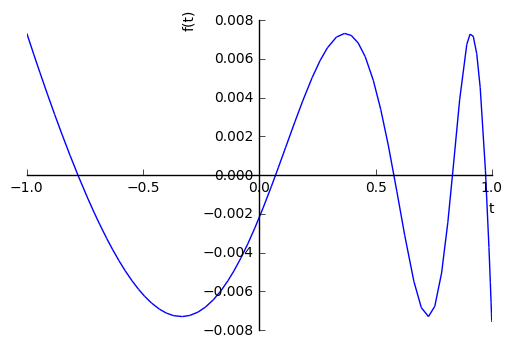

[-1, mpf('-0.33529366659804761563053963066322487587650822829322849419008417270271943529353842718629930484917439594164524450889243881839705486716'), mpf('0.36895687345956005985912190824587634505109830677005503487877944928994171758346954961453016659248181733341947894250023367121238910911'), mpf('0.72592531713721846516379915097886380521272989529677089775390599108084730282987014237733792214979548894589503471802480251540661981719'), mpf('0.9110993120917803026629831594087244073769725403359434026667176042568606434841908581911867957038283374348773537757823697426649717211'), 0.999]


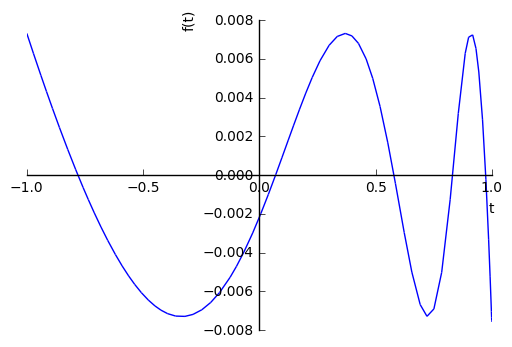

[-1, mpf('-0.33529366659804610973424083532342284437376758240076463585546288311777486841581493384093043192293328686735297395869663696759482027498'), mpf('0.36895687345956072569138519751211376422924245149887068342580420422461491373467434693154063946008335397774678224960464963859386735809'), mpf('0.72592531713721914251357628500108352395374971724993192638042954063415569791334438076170145191205844281723985291899898159532728497261'), mpf('0.91109931209177999077843877418443224913361280569054987780295093059757171596446567165447129991850828889185697437367864602672008094249'), 0.999]
(0.0043566245533141273230781597245776508573080729618868573617967806875665145339740711132577850744991642678888495139325092911858197764*t**2 - 0.18935520128560677084994796012973811192429404295762003213858011264568556631148746526203906982524336990604349198966503549431084259*t + 0.99269219179150098006260479755200086016708932691497268664146001156339276173759294229766609381096300272943002814988977706050122468)/(0.56970128

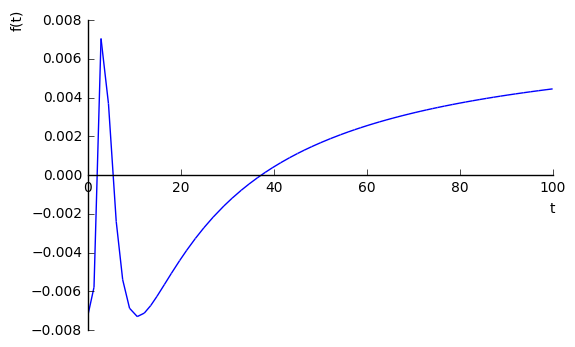

In [26]:
from sympy.utilities.decorator import conserve_mpmath_dps

@conserve_mpmath_dps
def CRAM_exp2(loops=2):
    import mpmath
    mpmath.mp.dps = 128

    epsilon = symbols("epsilon")
    p0, p1, p2, q1, q2 = symbols("p0, p1, p2, q1, q2")
    i = symbols("i")
    
    r = (p0 + p1*t + p2*t**2)/(1 + q1*t + q2*t**2)
    E = exp(-(-t - 1)/(2*t - 2)) - r
    expr = E + (-1)**i*epsilon
    expr = expr*(1 + q1*t + q2*t**2)
    expr = simplify(expr)

    points = [chebyshevt_root(7, 6 - j) for j in range(1, 7)]
    for _ in range(loops):
        system = Tuple(*[expr.subs({i: j, t: points[j]}) for j in range(6)])
#        system = system + Tuple(limit(expr.subs({i: 5}), t, points[5]))
#        print(system)
        sols = [dict(zip([p0, p1, p2, q1, q2, epsilon], nsolve(system, [p0, p1, p2, q1, q2, epsilon], [1, 1, 1, 1, 1, 0])))]
        D = diff(E.subs(sols[0]), t)
        plot(E.subs(sols[0]), (t, -1, 1))
        points = [-1, *nsolve_intervals(D, [-1, 0.99], maxsteps=300), 0.999]
        print(points)
    
    n, d = together(r.subs(sols[0]).subs(t, (2*t - 1)/(2*t + 1))).as_numer_denom() # simplify/cancel here will add degree to the numerator and denominator
    rat_func = (Poly(n)/Poly(d).TC())/(Poly(d)/Poly(d).TC())
    return rat_func.subs(sols[0])

D = CRAM_exp2()

rat_func = CRAM_exp2(10)
print(rat_func)
plot(rat_func - exp(-t), (t, 0, 100))

In [5]:
nsolve(D, (-1, -0.39506511254484362 - 1e-20), solver='bisect', tol=1e-20)

mpf('-0.39506511254488194')

In [6]:
#import mpmath
#mpmath.findroot?

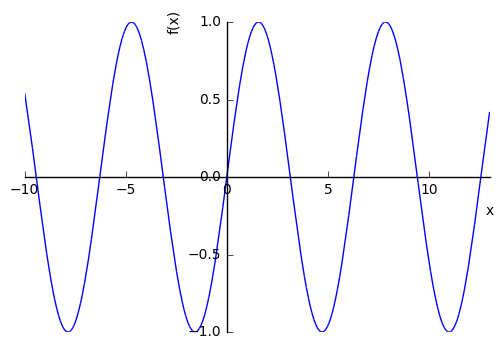

In [7]:
plot(sin(x), (x, -10, 13))

In [8]:
nsolve(sin(x), [-10, -0.1], solver='bisect')

mpf('-3.1415926535897932')

In [9]:
bisect_roots(D, [-1, 0.9], solver='bisect')

109


[mpf('-0.39506511254488194'),
 mpf('0.20691058995492143'),
 mpf('0.65489012733236148'),
 mpf('0.89772666518036129'),
 mpf('0.89772676518036132'),
 mpf('0.89772676518036132'),
 mpf('0.89772686518036127'),
 mpf('0.89772686518036127'),
 mpf('0.89772696518036121'),
 mpf('0.89772696518036121'),
 mpf('0.89772706518036116'),
 mpf('0.89772706518036116')]

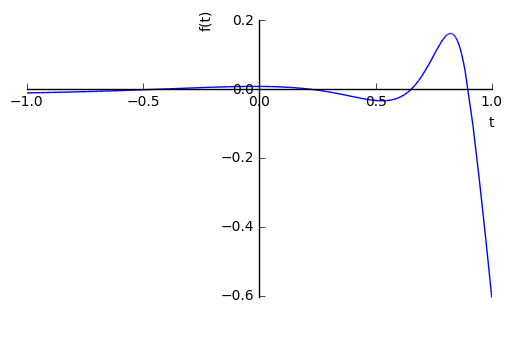

In [10]:
plot(D, (t, -1, 1))

In [11]:
nsolve(D, [mpf('0.2069106899549174') + 1e-4, 0.999], solver='ridder')

ValueError: Could not find root within given tolerance. (1.065e-06 > 2.1684e-19)
Try another starting point or tweak arguments.

In [ ]:
intervals = [[i/30, (i+1)/30] for i in range(-30, 29)]

In [ ]:
def catch_ValueError(f):
    try:
        return f()
    except ValueError:
        pass

In [ ]:
[catch_ValueError(lambda: nsolve(D, b, solver='bisect')) for b in intervals]

In [ ]:
sin(x).evalf(subs={x: mpf('9.9999999999999995e-8')})

In [12]:
nsolve(D, (-1, 0), solver='bisect')

mpf('-0.39506511254488194')

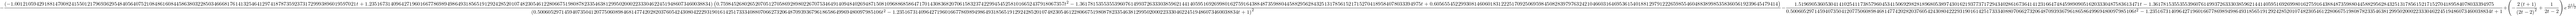

In [13]:
D

In [24]:
import mpmath
try:
    mpmath.mp.dps = 128
    print(nsolve(D, (-1, 0), solver='bisect', maxsteps=300))
finally:
    mpmath.mp.dps = 128

-0.39506511254488194246199448962614827641793897758069305848163786362903012773659849415062338092260647388604354886958668287303811029
